# Seaborn

[seaborn](https://github.com/mwaskom/seaborn)是一个基于matplotlib的python可视化库。提供了绘制统计图形的高级接口。也是一个使用者很多的可视化库。

## 安装

需要的库有：

- numpy
- scipy
- pandas
- matplotlib
- statsmodels

所以以上库都安装下。

```bash
python -m pip install --user numpy scipy matplotlib ipython jupyter pandas sympy nose

conda install statsmodels
```

然后安装seaborn

```bash
pip install seaborn
```

## 简介

文档参考：[seaborn: statistical data visualization](https://seaborn.pydata.org/)的[introduction](https://seaborn.pydata.org/introduction.html#introduction)

seaborn和pandas也结合的很好，基于matplotlib绘制。主要功能有：

- 检验多变量之间的关系
- 对类别变量统计的特别支持
- 单变量和二元变量的可视化，以及数据集内比较它们
- 线性回归模型可视化
- 复杂数据集整体结构可视化
- 复杂多图的高级抽象
- 内置主题轻松配置图形
- 调色板工具

接下来通过一个小示例，看看seaborn的基本使用方法。

In [1]:
# Pandas for managing datasets
import pandas as pd

In [2]:
# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline

seaborn使用matplotlib库，因此在jupyter中，注意在运行seaborn代码前，要先让matplotlib可显示。另外因为是绘制各类统计图，所以pandas也是常客。

接下来就是第一步，首先导入seaborn，通常以sns的名称导入。

In [3]:
# Seaborn for plotting and styling
import seaborn as sns

接下来就是通过set函数设置一些样式，如果set没有参数，那就是直接使用默认的theme，scaling和color palette。seaborn默认的这些设置都是建立在 matplotlib rcParam system 基础上的。

除了默认的，还有一些选项可以选择，可参考：[several other options](http://seaborn.pydata.org/tutorial/aesthetics.html#aesthetics-tutorial)。

Seaborn将matplotlib参数分成两个独立的groups。一个是绘图的美术风格，第二个是scale图形不同的元素的。

对应的，操作这两个group参数的也是两组函数。控制style的有：axes_style() and set_style() 函数。控制scale的：plotting_context() and set_context() 函数。

seaborn里有一些设置好的themes，包括：darkgrid, whitegrid, dark, white, and ticks。默认的是darkgrid。

除了这些风格之外，seaborn还允许用户定制styles，通过向axes_style() and set_style()的rc 传递参数，可以重写一些风格设置参数。具体有哪些参数可以调用如下命令得到，然后通过类似“sns.set_style("darkgrid", {"axes.facecolor": ".9"})”的代码即可实现定制化。

In [4]:
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': 'black',
 'axes.grid': False,
 'axes.axisbelow': 'line',
 'axes.labelcolor': 'black',
 'figure.facecolor': (1, 1, 1, 0),
 'grid.color': '#b0b0b0',
 'grid.linestyle': '-',
 'text.color': 'black',
 'xtick.color': 'black',
 'ytick.color': 'black',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': 'projecting',
 'patch.edgecolor': 'black',
 'image.cmap': 'viridis',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['DejaVu Sans',
  'Bitstream Vera Sans',
  'Computer Modern Sans Serif',
  'Lucida Grande',
  'Verdana',
  'Geneva',
  'Lucid',
  'Arial',
  'Helvetica',
  'Avant Garde',
  'sans-serif'],
 'patch.force_edgecolor': False,
 'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

关于scaling plot elements，也有一个参数集来控制，这个参数集可以配置。有四个默认的contexts：paper, notebook, talk, and poster.  其中，notebook是默认的。通过“sns.set_context("paper")”代码可以配置。当然也可以通过类似上面的方式类配置具体的参数：
```python
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
```

紧接着第三步，就是加载数据了，如下所示是使用的load_dataset函数，这是个调用官方示例数据集的函数，它们都是pandas的dataframe。如果将自己的数据集组织成tidy数据集，那么就能充分运用seaborn的优点。

seaborn的数据集特定的格式是“long-form”的或者称为“tidy”数据，关于该数据类型是什么意思可以参考这个[academic paper](http://vita.had.co.nz/papers/tidy-data.html)，这个文件也不大，所以放到该文件夹下了，如果需要翻译，可以参考：[数据整理（Tidy Data）—翻译Hadley Wickham的一篇论文](https://zhuanlan.zhihu.com/p/27579776) 。这里暂简单对tidy dataset的定义做些介绍性记录。

tidy dataset核心思想是：“整齐的数据”就是每个变量是一列，每组观测是一行，并且each type of observational unit都可以组成一个table。这会使数据的处理变得简单。实际处理过数据的都知道，数据清理工作花费的时间是很多的。包括离群值检查，数据解析，缺失值处理等。tidy datasets这种标准化的结构化数据集的方式可以让初期的数据清洗变得简单，因为有了它就不需要重复造轮子了。tidy datasets的核心思想其实并不稀罕，就是**关系型数据库**和关系代数，只不过是以一种**统计学的角度**来描述。这种数据哲学也体现在了两个作者开发的R数据工具包中：plyr和ggplot2.

简单解释核心思想：整齐的数据都是相似的，但是混乱的数据各有各的混乱。数据集是值的集合，包括定量和定性的。值以两种方式组织，一是varaible，一是observation。一个varaible包括了相同underlying attribute（比如高度，温度等）不同units的所有values，一个observation包括了相同unit（比如某人，某天等）不同attributes的所有values。比如[原文表3](v59i10.pdf) 一个3 variables, 6 observations 的datasets包括18个值。每列一个variable，每行一个observation。（单独对某个实例分析什么是变量什么是观测是容易的，但是从更general的角度来描述是困难的。）一个数据集是不是tidy data的要看它的行，列和tables是如何和observations，variables和types匹配的。tidy数据就是符合第三范式的数据。简言之，就是列原子性+主键唯一标识（论文表3里可以理解dataframe自动加的有行索引是主键）+非主键属性直接依赖于主键而不依赖于非主键。翻译到统计语言下，就是上一段文字开头描述的核心思想，简单解释下第三条，这条容易confused，个人理解就是说表内属性有依赖的，违背了第三范式，比如[原文表8](v59i10.pdf)，每个week每个track的歌手和时间是完全对应且不变的，因此数据是冗余的，可以分成两个数据集song和rank，表13有展示分开后的样式。具体的数据组织，fixed variable放在前面比较好，然后是measured values，对于每行observation就对应列的形式组织下去即可。

以上就是tidy Dataset的意思，总之，如果了解关系数据库，就理解成关系型数据库的表设计就好了。后面用到相关数据整理技巧时，再对这篇文章做进一步解读，关于将dataframe数据处理成tidy data的形式可以参考：[Modern Pandas (Part 5): Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [5]:
sns.set()
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


最后一步就是调用绘制函数replot()，这个函数绘制了tips数据集中5个variables的关系。3个是数值型变量，2个是categorical的。两个数值变量确定了坐标位置，size变量决定了点的大小，time变量将数据分到了两个子图上，最后smoker变量标识了点的颜色。

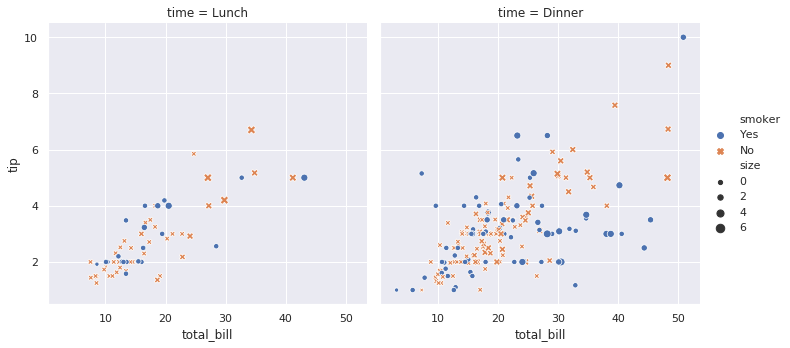

In [6]:
sns.relplot(x="total_bill", y="tip", col="time",
            hue="smoker", style="smoker", size="size",
            data=tips);

在数据可视化过程中，并没有银弹。要具体问题具体分析。不过seaborn尽可能地让数据可视化变得简单。replot()函数之所以被叫做“re”plot，是因为它可以可视化不同的统计关系。比如：

In [7]:
dots = sns.load_dataset("dots")
dots.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


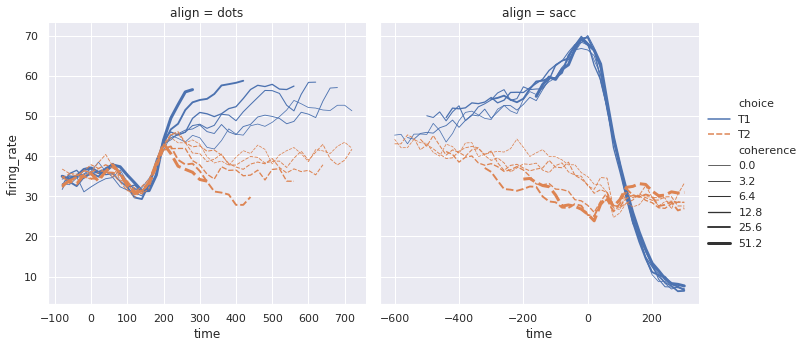

In [8]:
sns.relplot(x="time", y="firing_rate", col="align",
            hue="choice", size="coherence", style="choice",
            facet_kws=dict(sharex=False),
            kind="line", legend="full", data=dots);

根据数据实际情况，可以配置replot的kind参数，选择折线图来可视化时间序列数据。

有时候我们会比较关心统计估计和误差范围。

In [9]:
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


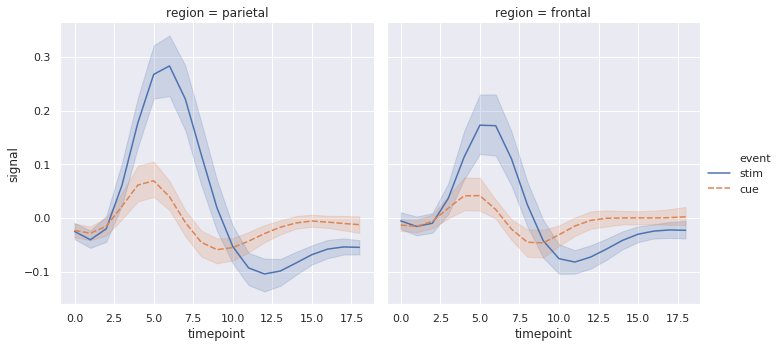

In [10]:
sns.relplot(x="timepoint", y="signal", col="region",
            hue="event", style="event",
            kind="line", data=fmri);

对于类型变量，绘制使用的函数是catplot。

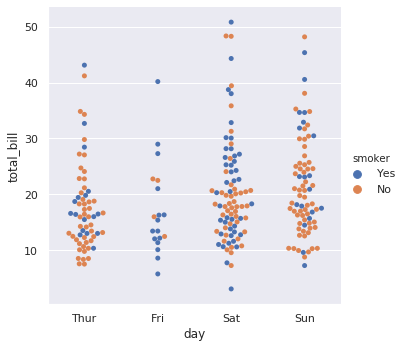

In [11]:
sns.catplot(x="day", y="total_bill", hue="smoker",
            kind="swarm", data=tips);

此外，还可以使用核密度估计来表示数据可能的分布：

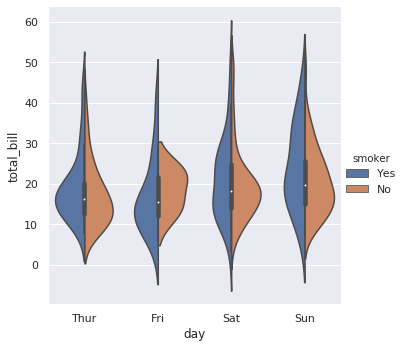

In [12]:
sns.catplot(x="day", y="total_bill", hue="smoker",
            kind="violin", split=True, data=tips);

上面记录的都是figure一级的函数，它们都是可以在多个axes上绘制图形的（比如使用matplotlib绘制散点图时用scatterplot函数，这个函数就是axes级的，因为它们是在一个matplotlib的轴上绘图的，不会影响其他部分）。它们能处理一些比如在坐标轴外放置图例等麻烦的操作。它们操作了axes级的函数，这其中它们用到FacetGrid。每个figure级的函数都会联合使用axes级的函数和FacetGrid对象。FacetGrid对象是figure级函数返回的对象。

seaborn在控制axes级的函数方面和matplotlib不同，matplotlib中绘制多axes的图时，需要分别控制每个axes图，比如宽度和高度，而seaborn主要是整体上的控制，调整比例，比如宽高比。

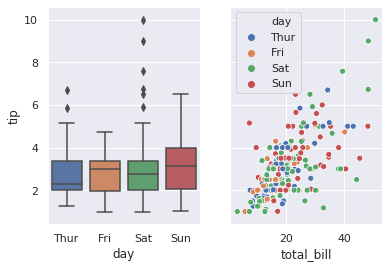

In [13]:
import matplotlib.pyplot as plt
f, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(x="day", y="tip", data=tips, ax=axes[0])
sns.scatterplot(x="total_bill", y="tip", hue="day", data=tips, ax=axes[1]);

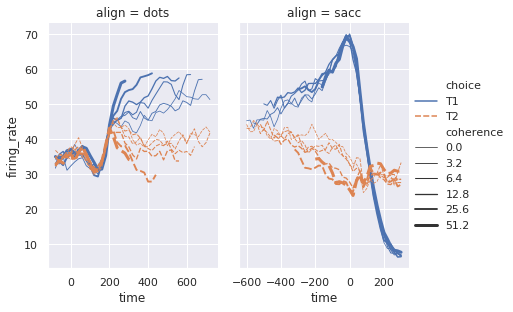

In [14]:
sns.relplot(x="time", y="firing_rate", col="align",
            hue="choice", size="coherence", style="choice",
            height=4.5, aspect=2 / 3,
            facet_kws=dict(sharex=False),
            kind="line", legend="full", data=dots);

还有一些可以可视化数据的结构的绘图函数，比如下面这个可以按区间给出一些数据的量：

In [15]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


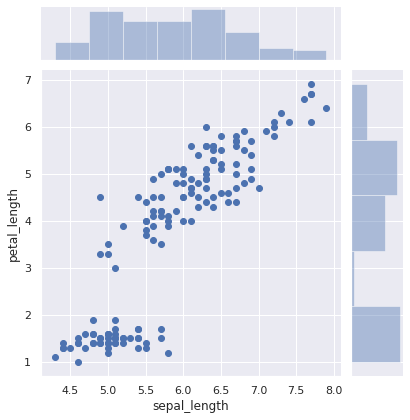

In [16]:
sns.jointplot(x="sepal_length", y="petal_length", data=iris);

还有一个比较重要的内容：定制plot。首先就是使用不同的主题，主题一换，全图都换。

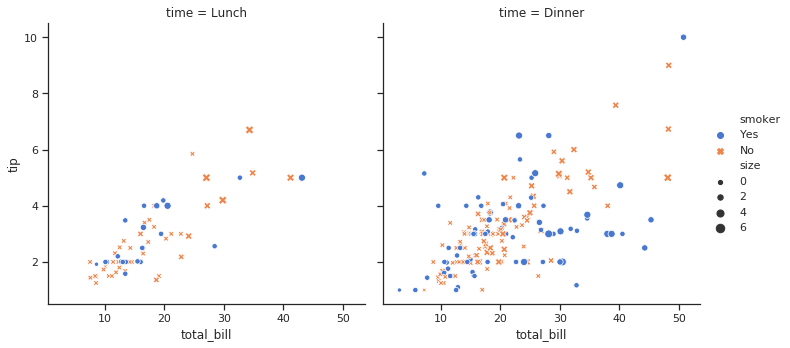

In [17]:
sns.set(style="ticks", palette="muted")
sns.relplot(x="total_bill", y="tip", col="time",
            hue="smoker", style="smoker", size="size",
            data=tips);

第二种就是figure级别上的特定设置。

所有的seaborn函数都会接受一些可选的参数来切换某些默认的设置。比如调颜色，这方面可以参考：[extensive support for customizing color palettes](https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial)。颜色通常是比其他图形样式更重要的方面，因为如果用的好，它能很好的揭示数据的模式。关于如何较好地配色有一些很好的资料：[series of blog posts from Rob Simmon](https://earthobservatory.nasa.gov/blogs/elegantfigures/2013/08/05/subtleties-of-color-part-1-of-6/) and [this more technical paper](https://cfwebprod.sandia.gov/cfdocs/CompResearch/docs/ColorMapsExpanded.pdf). matplotlib官方也给出了一个很好的[tutorial](https://matplotlib.org/tutorials/colors/colormaps.html)。Rob Simmon的blog是NASA earth observatory网站里的东西，NASA各种漂亮的图想必和它们也有些关系吧，因此在[另外一文](ElegantFigures.md)中简单地记录一下这些blog的主要内容。这里就不再赘述了。

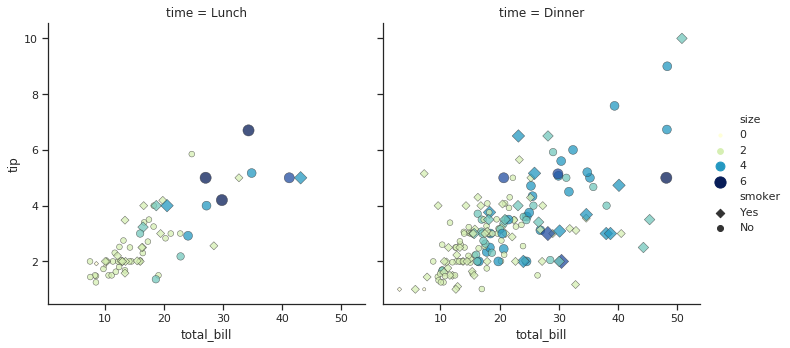

In [18]:
sns.relplot(x="total_bill", y="tip", col="time",
            hue="size", style="smoker", size="size",
            palette="YlGnBu", markers=["D", "o"], sizes=(10, 125),
            edgecolor=".2", linewidth=.5, alpha=.75,
            data=tips);

seaborn中选择调色板是很容易的。最重要的工具就是color_palette()函数了。该函数提供了接口使得我们可以很多方式起来生成颜色，并且可以让任意一个有palette参数的函数调用。

该函数能接受任意seaborn调色板或matplotlib颜色图的名称，也能接受一系列以任意matplotlib格式（RGB等）指定的颜色。

没有参数的话就是默认的调色板。

另外，要想给数据配置一个最好的调色板，是要了解数据的特性。seaborn按数据的不同给出了三个general的类型的调色板： qualitative, sequential, 和 diverging.

当想要区分没有内在顺序的数据的离散数据块时，可以使用Qualitative color palettes。有6个默认的主题， deep, muted, pastel, bright, dark, and colorblind.

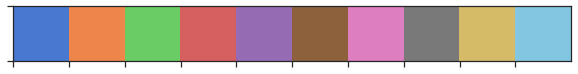

In [19]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

其他颜色可以在实际使用时再选择，这里暂不记录了。Sequential color palettes颜色板适用于数据范围从相对低值到相对高值的情况。

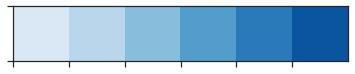

In [22]:
sns.palplot(sns.color_palette("Blues"))

Diverging color palettes用于对大的低值和高值都感兴趣的数据。数据中通常还有一个定义良好的中点。如果您正在绘制从某个基线时间点开始的温度变化，那么最好使用一个发散的颜色映射来显示相对减少的区域和相对增加的区域。

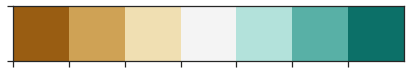

In [23]:
sns.palplot(sns.color_palette("BrBG", 7))

前面说了一些颜色的配置，另外还可以通过传递给FacetGrid的其他参数来完成图形级函数的一些自定义，并且可以使用该对象上的方法来控制图形的许多其他属性。为了进行更多的调整，可以访问绘制绘图的matplotlib对象，这些对象存储为属性。

不过对于relplot()和其他图形级函数，有几个间接层，因为relplot()将其exta关键字参数传递给底层的seaborn axis级函数，后者将其额外的关键字参数传递给底层的matplotlib函数。因此，可能需要花费一些努力才能找到需要使用的参数的正确的文档，但是在原则上，非常高的自定义级别是可能的。

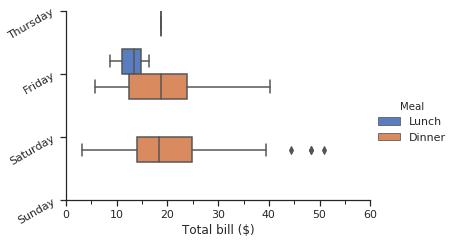

In [24]:
g = sns.catplot(x="total_bill", y="day", hue="time",
                height=3.5, aspect=1.5,
                kind="box", legend=False, data=tips);
g.add_legend(title="Meal")
g.set_axis_labels("Total bill ($)", "")
g.set(xlim=(0, 60), yticklabels=["Thursday", "Friday", "Saturday", "Sunday"])
g.despine(trim=True)
g.fig.set_size_inches(6.5, 3.5)
g.ax.set_xticks([5, 15, 25, 35, 45, 55], minor=True);
plt.setp(g.ax.get_yticklabels(), rotation=30);

seaborn的图形级函数是面向有效探索的，因此使用seaborn函数来管理需要精确调整大小和组织的图形可能比直接在matplotlib中设置图形和使用相应的轴级要花费更多的精力。Matplotlib有一个全面而强大的API;图的任何属性都可以根据您的喜好进行更改。

所以比较好的构图方式是seaborn的高级接口和matplotlib的深度自定义能力的组合，这将允许快速浏览数据和创建图形，可以裁剪成出版质量的最终产品。

接下来可以直接在官方文档的Gallery中快速地浏览seaborn能制作的图形。更多工具可以查看：[official tutorial](https://seaborn.pydata.org/tutorial.html#tutorial)和 [API reference](https://seaborn.pydata.org/api.html#api-ref)

## 实践

个人认为使用seaborn有两个比较重要的方面需要注意，一个就是如何用pandas将数据集调整为tidy dataset的pandas的dataframe，一个就是如何结合使用seaborn和matplotlib来使绘图变得既简单又有细节的定制调整。

接下来记录一些自己平常用到的图形的绘制。

### 箱线图

In [2]:
# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="ticks", palette="pastel")

# Load the example tips dataset
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


tips是tidy data，图是二维图，x是横轴，选择一个变量，y是纵轴，也只能代表一个变量。hue是色彩对应的图例，palette则是颜色板。

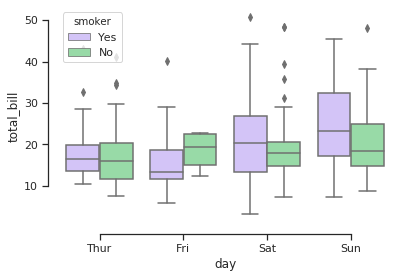

In [4]:
# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="day", y="total_bill",
            hue="smoker", palette=["m", "g"],
            data=tips)
sns.despine(offset=10, trim=True)

接下来首先看看如果数据不是tidy data的话，应该怎么转换过来。举一些例子，主要参考了：[tidy-data-python](https://github.com/nickhould/tidy-data-python)和[Python_TidyData](https://github.com/AnalyticsInsightsNinja/Python_TidyData)

In [6]:
import pandas as pd
df = pd.read_csv("./data/pew-raw.csv")
df

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k
0,Agnostic,27,34,60,81,76,137
1,Atheist,12,27,37,52,35,70
2,Buddhist,27,21,30,34,33,58
3,Catholic,418,617,732,670,638,1116
4,Dont know/refused,15,14,15,11,10,35
5,Evangelical Prot,575,869,1064,982,881,1486
6,Hindu,1,9,7,9,11,34
7,Historically Black Prot,228,244,236,238,197,223
8,Jehovahs Witness,20,27,24,24,21,30
9,Jewish,19,19,25,25,30,95


使用pandas的melt函数，来快速实现向tidy data的转换。

In [7]:
formatted_df = pd.melt(df,["religion"], var_name="income", value_name="freq")
formatted_df = formatted_df.sort_values(by=["religion"])
formatted_df.head(10)

,religion,income,freq
0,Agnostic,<$10k,27
30,Agnostic,$30-40k,81
40,Agnostic,$40-50k,76
50,Agnostic,$50-75k,137
10,Agnostic,$10-20k,34
20,Agnostic,$20-30k,60
41,Atheist,$40-50k,35
21,Atheist,$20-30k,37
11,Atheist,$10-20k,27
31,Atheist,$30-40k,52


### 时间序列图

绘制时间序列图。

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")

rs = np.random.RandomState(365)
values = rs.randn(365, 4).cumsum(axis=0)
values

array([[  0.16792113,   0.52350518,   0.81737553,   1.70384552],
       [ -1.97902642,   1.23770369,   0.05723019,   2.74326736],
       [ -2.94547836,   1.09402466,   1.62835461,   2.35998788],
       ...,
       [-20.16215347,   9.46658006, -10.38886875,  17.95576784],
       [-20.32296367,   9.63655141,  -7.97732518,  19.39724181],
       [-20.76771621,  11.01141408,  -7.94147579,  19.35811172]])

注意数据的格式，既然是时间序列，那么index就是时间序列。然后后面每列是一个变量。

In [14]:
dates = pd.date_range("1 1 2016", periods=365, freq="D")
data = pd.DataFrame(values, dates, columns=["A", "B", "C", "D"])
data

,A,B,C,D
2016-01-01,0.167921,0.523505,0.817376,1.703846
2016-01-02,-1.979026,1.237704,0.057230,2.743267
2016-01-03,-2.945478,1.094025,1.628355,2.359988
2016-01-04,-2.307479,0.749367,1.624072,2.518347
2016-01-05,-3.270573,0.333310,1.867085,2.866550
...,...,...,...,...
2016-12-26,-19.091161,11.538091,-12.324271,15.728471
2016-12-27,-19.896686,9.886417,-11.185668,16.971170
2016-12-28,-20.162153,9.466580,-10.388869,17.955768
2016-12-29,-20.322964,9.636551,-7.977325,19.397242


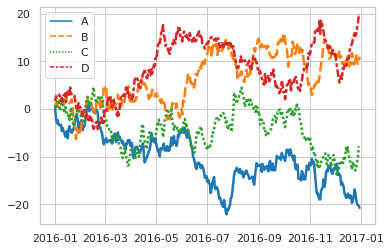

In [15]:
sns.lineplot(data=data, palette="tab10", linewidth=2.5)

### 图Grid

绘制多图矩阵，在seaborn中使用的是FacetGrid。这部分可以参考：[axis_grids](https://seaborn.pydata.org/tutorial/axis_grids.html)。

grid图也称为lattice或trellis图。matplotlib提供了很好的对 multiple axes 的支持，seaborn是在此基础上建立的，并直接将plot的结构和数据集的结构联系起来。数据格式必须是tidy data。即每列是一个变量，每行是一个observation。前面已经说了，这里不再赘述。看例子：

In [24]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


看数据格式，row定义了每行的对象，col就是定义了grid的每列绘图对象。如下代码所示，FacetGrid只是提供了绘图的框框。

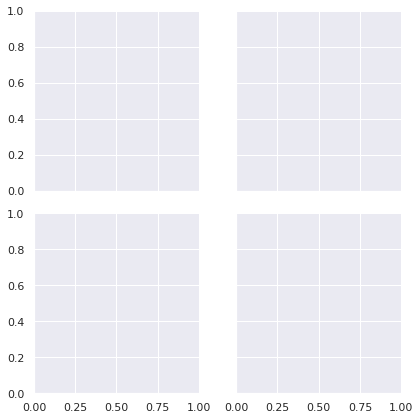

In [26]:
g = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)

具体绘制什么图由g.map+plt.hist定义，即调用FacetGrid对象的map函数，通过指定matplotlib的绘图类型为参数来绘制。

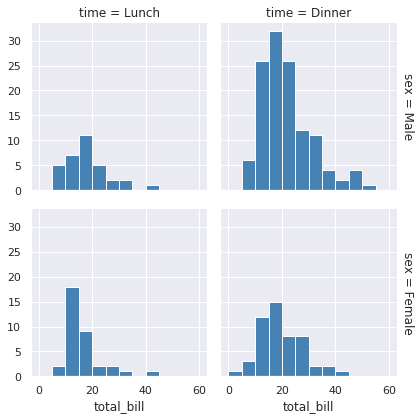

In [28]:
g = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
bins = np.linspace(0, 60, 13)
g.map(plt.hist, "total_bill", color="steelblue", bins=bins)

plt.hist只指定一个变量，不过比如scatter图就需要指定两个变量了，x变量在前，y变量在后。

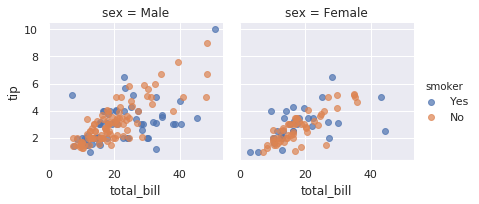

In [29]:
g = sns.FacetGrid(tips, col="sex", hue="smoker")
g.map(plt.scatter, "total_bill", "tip", alpha=.7)
g.add_legend();

也可以绘制折线图(alpha表示透明度)：

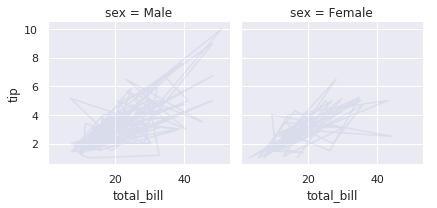

In [8]:
g = sns.FacetGrid(tips,row=None, col="sex")
g.map(plt.plot, "total_bill", "tip", alpha=.7)
g.add_legend()

### 定制图形

比如定制grid各个子单元的大小范围，坐标轴等。还是上面的一个例子，接下来看看如何进行图形的形状设置。这小节主要参考了官方文档：[Building structured multi-plot grids](https://seaborn.pydata.org/tutorial/axis_grids.html)

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


比如设置height来定义每个图的高度。设置aspect可以来设置每个子图的高宽比例，数值越大，代表越宽。

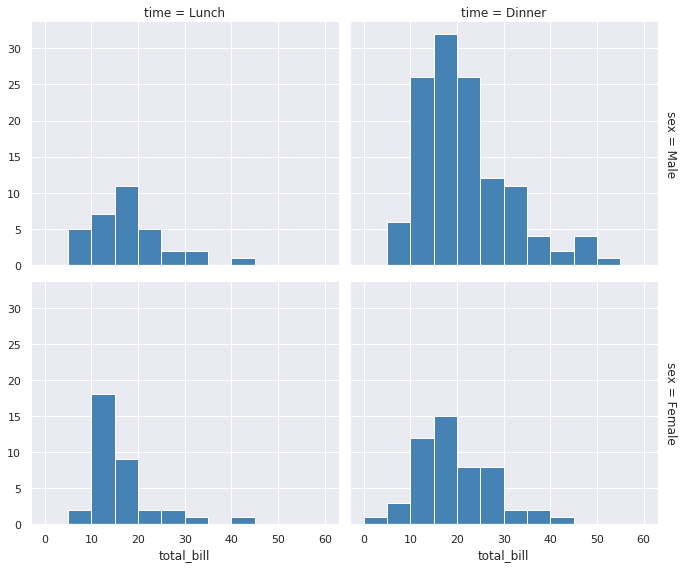

In [6]:
g = sns.FacetGrid(tips, row="sex", col="time", height=4,aspect=1.2,margin_titles=True)
bins = np.linspace(0, 60, 13)
g.map(plt.hist, "total_bill", color="steelblue", bins=bins)

接下来看看如何定义坐标轴的相关信息。